In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from imblearn.over_sampling import SMOTE

In [11]:
df = pd.read_csv(r'files_for_lab\Customer-Churn.csv')
cols = []
for i in range(len(df.columns)):
    cols.append(df.columns[i].lower().replace(' ', '_'))
df.columns = cols
df

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [12]:
df.isna().sum().sum()

0

In [13]:
df.duplicated().sum()

49

In [14]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [8]:
df.columns = df.columns.str.lower()
df.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [9]:
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
numerical_columns

['seniorcitizen', 'tenure', 'monthlycharges']

In [10]:
df.groupby('churn').count()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,monthlycharges,totalcharges
churn,,,,,,,,,,,,,,,
No,5144,5144,5144,5144,5144,5144,5144,5144,5144,5144,5144,5144,5144,5144,5144
Yes,1850,1850,1850,1850,1850,1850,1850,1850,1850,1850,1850,1850,1850,1850,1850


In [15]:
churn = df[['churn', 'tenure', 'seniorcitizen','monthlycharges']]
churn

,churn,tenure,seniorcitizen,monthlycharges
0,No,1,0,29.85
1,No,34,0,56.95
2,Yes,2,0,53.85
3,No,45,0,42.30
4,Yes,2,0,70.70
...,...,...,...,...
7038,No,24,0,84.80
7039,No,72,0,103.20
7040,No,11,0,29.60
7041,Yes,4,1,74.40


In [16]:
X = churn.drop('churn', axis = 1)
y = churn['churn']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

LR = LogisticRegression()
LR.fit(X_train, y_train)

LR.score(X_test, y_test)

0.7884203002144389

In [19]:
pred = LR.predict(X_test)

print('Precision: ', precision_score(y_test, pred, pos_label = 'Yes'))
print('Recall: ', recall_score(y_test, pred, pos_label = 'Yes'))
print('F1: ', f1_score(y_test, pred, pos_label = 'Yes'))

Precision:  0.5766666666666667
Recall:  0.5058479532163743
F1:  0.5389408099688473


In [20]:
confusion_matrix(y_test, pred)

array([[930, 127],
       [169, 173]], dtype=int64)

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state =0,sampling_strategy=1) 
# one means that I want a ratio of 1 between majority and abudance class. 

#### SMOTE

In [21]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 0, sampling_strategy = 1) 

In [22]:
X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)

In [23]:
train_smote = pd.concat([X_train_SMOTE,y_train_SMOTE], axis = 1)
train_smote
train_smote.sum()

tenure                                                       228154
seniorcitizen                                                  1226
monthlycharges                                         555793.43747
churn             NoNoYesYesNoYesNoNoYesNoNoNoNoYesYesNoNoNoNoNo...
dtype: object

In [24]:
LR_smote = LogisticRegression()
LR_smote.fit(X_train_SMOTE, y_train_SMOTE)

print (LR_smote.score(X_test, y_test))

0.725518227305218


In [25]:
pred_smote = LR_smote.predict(X_test)

print('Precision: ', precision_score(y_test, pred_smote, pos_label = 'Yes'))
print('Recall: ', recall_score(y_test, pred_smote, pos_label = 'Yes'))
print('F1: ', f1_score(y_test, pred_smote, pos_label = 'Yes'))

Precision:  0.4618181818181818
Recall:  0.7426900584795322
F1:  0.5695067264573992


In [27]:
confusion_matrix(y_test, pred_smote)

array([[761, 296],
       [ 88, 254]], dtype=int64)

In [29]:
from sklearn.tree import DecisionTreeClassifier

max_depth = range(1, 20)
test = []
train = []

for depth in max_depth:
    model = DecisionTreeClassifier(max_depth = depth)
    model.fit(X_train_SMOTE, y_train_SMOTE)
    test.append(model.score(X_test, y_test))
    train.append(model.score(X_train_SMOTE, y_train_SMOTE))

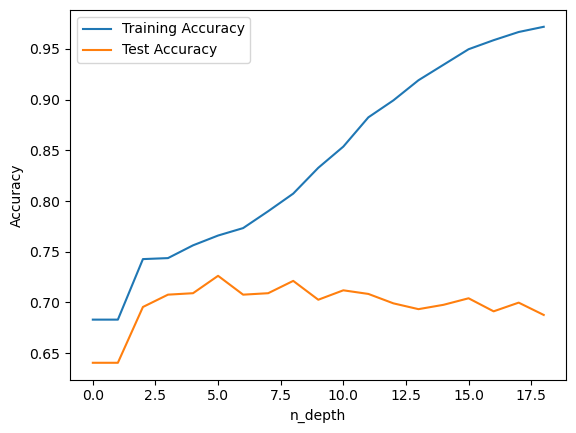

In [30]:
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

plt.plot(train, label = 'Training Accuracy')
plt.plot(test, label = 'Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_depth')
plt.legend()

In [31]:
model_smote = DecisionTreeClassifier(max_depth = 5)
model_smote.fit(X_train_SMOTE, y_train_SMOTE)

DecisionTreeClassifier(max_depth=5)

In [32]:
model_smote.score(X_test, y_test)

0.7090779127948534

In [35]:
pred_tree_smote = model_smote.predict(X_test)

print('Precision: ', precision_score(y_test, pred_tree_smote, pos_label = 'Yes'))
print('Recall: ', recall_score(y_test, pred_tree_smote, pos_label = 'Yes'))
print('F1: ', f1_score(y_test, pred_tree_smote, pos_label = 'Yes'))

Precision:  0.4459234608985025
Recall:  0.783625730994152
F1:  0.5683987274655355


In [36]:
confusion_matrix(y_test,pred_tree_smote)

array([[724, 333],
       [ 74, 268]], dtype=int64)

In [38]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy = 'majority')
X_resampled, y_resampled = tl.fit_resample(X, y)

In [39]:
LR_tomek = LogisticRegression()
LR_tomek.fit(X_resampled, y_resampled)

print (LR_tomek.score(X_test, y_test))

0.777698355968549


In [40]:
pred_tomek = LR_tomek.predict(X_test)

print('Precision: ', precision_score(y_test, pred_tomek, pos_label = 'Yes'))
print('Recall: ', recall_score(y_test, pred_tomek, pos_label = 'Yes'))
print('F1: ',f1_score(y_test, pred_tomek, pos_label = 'Yes'))

Precision:  0.5462686567164179
Recall:  0.5350877192982456
F1:  0.5406203840472674


In [41]:
confusion_matrix(y_test, pred_tomek)

array([[905, 152],
       [159, 183]], dtype=int64)

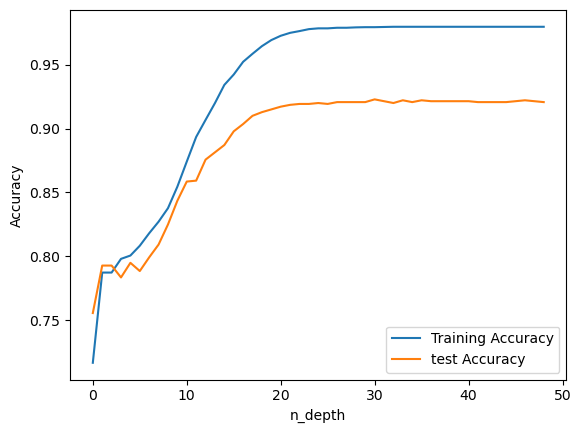

In [42]:
from sklearn.tree import DecisionTreeClassifier

max_depth = range(1, 50)
test = []
train = []

for depth in max_depth:
    model = DecisionTreeClassifier(max_depth = depth)
    model.fit(X_resampled, y_resampled)
    test.append(model.score(X_test, y_test))
    train.append(model.score(X_resampled, y_resampled))
    

from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

plt.plot(train, label = 'Training Accuracy')
plt.plot(test, label = 'test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_depth')
plt.legend()

In [43]:
model_tomek = DecisionTreeClassifier(max_depth = 45)
model_tomek.fit(X_resampled, y_resampled)

DecisionTreeClassifier(max_depth=45)

In [44]:
model_tomek.score(X_test, y_test)

0.9213724088634739

In [45]:
pred_tree_tomek = model_tomek.predict(X_test)

print('Precision: ', precision_score(y_test, pred_tree_tomek, pos_label = 'Yes'))
print('Recall: ', recall_score(y_test, pred_tree_tomek, pos_label = 'Yes'))
print('f1: ', f1_score(y_test, pred_tree_tomek, pos_label = 'Yes'))

Precision:  0.7857142857142857
Recall:  0.9327485380116959
f1:  0.8529411764705882


In [47]:
confusion_matrix(y_test, pred_tree_tomek)

array([[970,  87],
       [ 23, 319]], dtype=int64)